In [136]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import datetime

## Read in 5 minute bars of NVDA prices for calendar year 2022

### All times are US Eastern

In [137]:
df = pd.read_csv('c:/Users/steve/Documents/nvda_5_min_bars_2022.csv')

In [138]:
# Set the timestamp column as the index (a DateTimeIndex),
# and make sure the data is sorted by timestamp
df['Datetime'] = pd.to_datetime(df['Datetime']).astype('datetime64[ns]')
df.set_index(df['Datetime'], inplace=True)
df.sort_index()

,Datetime,Open,High,Low,Last,Volume,Dividends,Stock splits
Datetime,,,,,,,,
2022-01-03 09:30:00,2022-01-03 09:30:00,298.150,304.2999,297.850,304.0299,1827510,0.0,0
2022-01-03 09:35:00,2022-01-03 09:35:00,303.980,307.1100,303.400,305.3800,1482708,0.0,0
2022-01-03 09:40:00,2022-01-03 09:40:00,305.420,306.1900,304.200,305.2380,921839,0.0,0
2022-01-03 09:45:00,2022-01-03 09:45:00,305.240,305.5100,301.500,301.8500,1036683,0.0,0
2022-01-03 09:50:00,2022-01-03 09:50:00,301.940,302.1600,299.400,300.6000,1033115,0.0,0
...,...,...,...,...,...,...,...,...
2022-12-30 15:35:00,2022-12-30 15:35:00,144.950,145.1000,144.760,145.0750,252105,0.0,0
2022-12-30 15:40:00,2022-12-30 15:40:00,145.075,145.3300,144.970,145.2548,403721,0.0,0
2022-12-30 15:45:00,2022-12-30 15:45:00,145.260,145.8500,145.170,145.7550,487317,0.0,0


## Slice the data by time of day and get descriptive statistics by time

In [139]:
df['bar_start_time'] = df.index.strftime("%H:%M:%S")

In [140]:
volume_stats = df['Volume'].groupby(df['bar_start_time']).describe()

In [141]:
# Convert the 5-minute bar volumes to percentages of daily volumes
daily_avg_volume = volume_stats['mean'].sum()
volume_stats['mean_pct_of_day'] = volume_stats['mean'] / daily_avg_volume
volume_stats['cumul_pct_of_day'] = volume_stats['mean_pct_of_day'].cumsum()

In [142]:
volume_stats

,count,mean,std,min,25%,50%,75%,max,mean_pct_of_day,cumul_pct_of_day
bar_start_time,,,,,,,,,,
09:30:00,251.0,1.647135e+06,6.293474e+05,747445.0,1234140.50,1516596.0,1873786.00,4810753.0,0.039283,0.039283
09:35:00,251.0,1.069336e+06,3.810225e+05,376683.0,814239.50,997421.0,1262583.00,3672912.0,0.025503,0.064787
09:40:00,251.0,1.015738e+06,3.422329e+05,439574.0,782620.50,976678.0,1189956.00,2443782.0,0.024225,0.089012
09:45:00,251.0,9.645104e+05,3.599192e+05,399357.0,756389.50,895154.0,1129012.00,3210399.0,0.023003,0.112015
09:50:00,251.0,8.800452e+05,3.098251e+05,303217.0,690744.00,830061.0,1029163.00,2273469.0,0.020989,0.133003
...,...,...,...,...,...,...,...,...,...,...
15:35:00,250.0,4.928115e+05,1.897371e+05,168583.0,368884.00,454512.0,574987.00,1511358.0,0.011753,0.880063
15:40:00,250.0,5.154305e+05,1.936319e+05,209192.0,390834.25,480723.0,609095.00,1718991.0,0.012293,0.892356
15:45:00,250.0,5.620450e+05,1.909729e+05,242657.0,422857.50,528758.5,663864.25,1520014.0,0.013405,0.905761


## Graph the average intraday volume by time

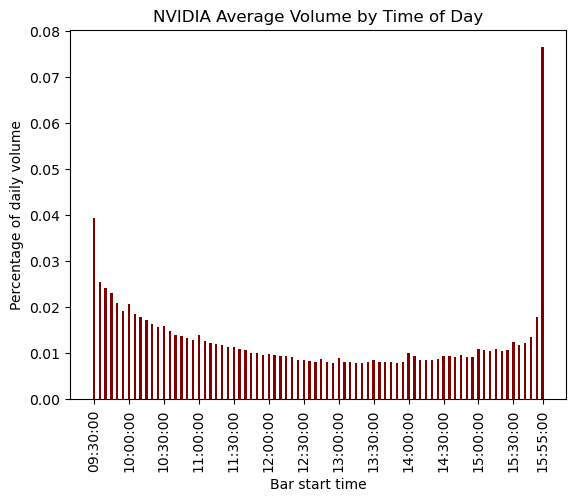

In [143]:
plt.bar(volume_stats.index, volume_stats['mean_pct_of_day'], color ='maroon',
       width = 0.4)
plt.xticks(rotation = 90)
plt.xticks([0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 77])
plt.xlabel("Bar start time")
plt.ylabel("Percentage of daily volume")
plt.title("NVIDIA Average Volume by Time of Day")
plt.show()

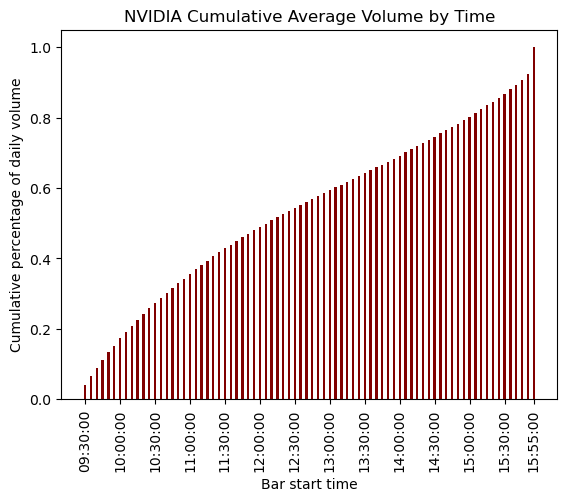

In [144]:
plt.bar(volume_stats.index, volume_stats['cumul_pct_of_day'], color ='maroon',
       width = 0.4)
plt.xticks(rotation = 90)
plt.xticks([0, 6, 12, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 77])
plt.xlabel("Bar start time")
plt.ylabel("Cumulative percentage of daily volume")
plt.title("NVIDIA Cumulative Average Volume by Time")
plt.show()

In [145]:
# 21% of daily volume typically occurs in the first 45 minutes
# of a 6-and-a-half-hour trading day!
volume_stats.head(9)

,count,mean,std,min,25%,50%,75%,max,mean_pct_of_day,cumul_pct_of_day
bar_start_time,,,,,,,,,,
09:30:00,251.0,1.647135e+06,629347.380740,747445.0,1234140.5,1516596.0,1873786.0,4810753.0,0.039283,0.039283
09:35:00,251.0,1.069336e+06,381022.463757,376683.0,814239.5,997421.0,1262583.0,3672912.0,0.025503,0.064787
09:40:00,251.0,1.015738e+06,342232.886356,439574.0,782620.5,976678.0,1189956.0,2443782.0,0.024225,0.089012
09:45:00,251.0,9.645104e+05,359919.191378,399357.0,756389.5,895154.0,1129012.0,3210399.0,0.023003,0.112015
09:50:00,251.0,8.800452e+05,309825.115325,303217.0,690744.0,830061.0,1029163.0,2273469.0,0.020989,0.133003
09:55:00,251.0,7.996362e+05,274641.989498,324826.0,617651.5,777588.0,912668.0,2380929.0,0.019071,0.152074
10:00:00,251.0,8.692662e+05,278288.295817,357795.0,665966.5,839363.0,1025982.5,1867772.0,0.020732,0.172806
10:05:00,251.0,7.796151e+05,257709.521852,311605.0,599822.0,756182.0,921806.5,1730239.0,0.018593,0.191400
10:10:00,251.0,7.524718e+05,273430.847963,308683.0,579742.0,703779.0,856174.5,2067545.0,0.017946,0.209346
